In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
df = pd.read_csv('/content/drive/MyDrive/traffic_congestion.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # Clean column names

In [3]:
# Optional: check for nulls
print("Missing values:\n", df.isnull().sum())

Missing values:
 sensor_count        0
avg_speed           0
time_of_day         0
congestion_level    0
dtype: int64


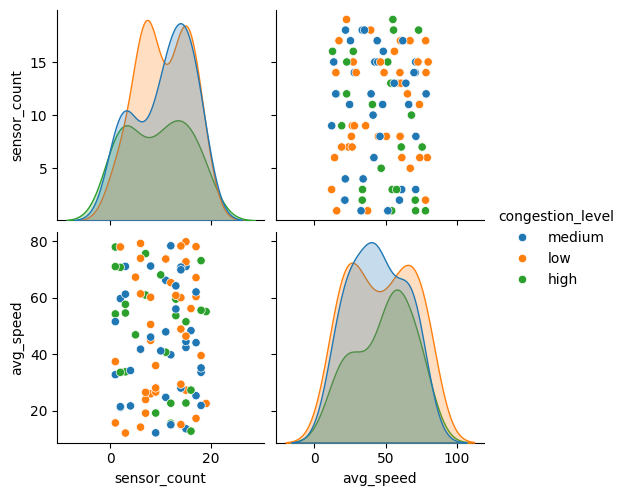

In [12]:
# Basic data visualization (optional but useful)
sns.pairplot(df, hue="congestion_level")
plt.show()

In [13]:
encoder = LabelEncoder()
df['time_of_day'] = encoder.fit_transform(df['time_of_day'])

In [14]:
# Define features (X) and target (y)
X = df[['time_of_day', 'avg_speed']]  # Features (input)
y = df['congestion_level']  # Target (output)

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Scale the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Predict and evaluate the model
y_pred = model.predict(X_test)

In [19]:
# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[0 1 3]
 [1 3 3]
 [1 5 3]]

Classification Report:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         4
         low       0.33      0.43      0.38         7
      medium       0.33      0.33      0.33         9

    accuracy                           0.30        20
   macro avg       0.22      0.25      0.24        20
weighted avg       0.27      0.30      0.28        20

